تم تحميل البيانات بنجاح!
عدد الصفوف: 79، عدد الأعمدة: 23

*** الأعمدة المتاحة في DataFrame بعد التحميل (قبل إعادة التسمية) ***
['Id', 'وقت البدء', 'وقت الإكمال', 'الجنس :', 'كم عمرك؟', 'هل تعاني من مشاكل صحية أو نفسية تؤثر على نومك؟', 'الحالة الحالية', 'ساعات_النوم', 'متى نمت تقريبا؟', 'هل كان نومك:', 'هل تستخدم الجوال قبل النوم؟', 'هل تأخذ قيلولة خلال اليوم؟', 'ما سبب قلة نومك (لو كنت تنام أقل من 6 ساعات غالبًا)؟', 'مزاج', 'طاقة', 'تركيز', 'تسويف', 'صعوبة_اجتماعية', 'تأثير_النوم_على_النفسية', 'صف شعورك لما تنام نومًا عميقًا وكافيًا:', 'متى آخر مرة حسيت أن قلة نومك أثرت عليك فعليًا؟ وش صار؟', 'ساعات_النوم_رقمي', 'تسويف_رقمي']
-------------------------------------------------------------------


*** الأعمدة بعد إعادة التسمية ***
['Id', 'وقت البدء', 'وقت الإكمال', 'الجنس :', 'كم عمرك؟', 'هل تعاني من مشاكل صحية أو نفسية تؤثر على نومك؟', 'الحالة الحالية', 'ساعات_النوم', 'متى نمت تقريبا؟', 'هل كان نومك:', 'هل تستخدم الجوال قبل النوم؟', 'هل تأخذ قيلولة خلال اليوم؟', 'ما سبب قلة نومك (لو كنت 

C:\Users\gknow\AppData\Local\Temp\ipykernel_17524\223193148.py:106: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(current_labels)


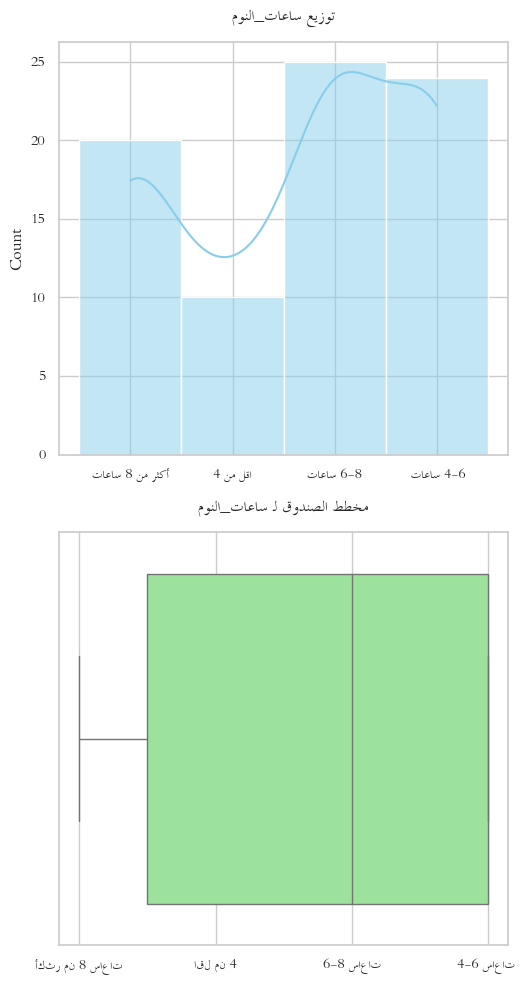

تنبيه: عمود 'الجنس' غير موجود. سيتم إنشاء Pair Plot بدون تلوين حسب الجنس.
لا توجد أعمدة رقمية كافية لإنشاء مخطط العلاقات (Pair Plot).


In [9]:
# -*- coding: utf-8 -*-

# 1. استيراد المكتبات مع تهيئة البيئة
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# استيراد المكتبات الجديدة لمعالجة النص العربي
import arabic_reshaper
from bidi.algorithm import get_display

# دالة مساعدة لمعالجة النص العربي
def get_arabic_text(text):
    """
    يعالج النص العربي لضمان ظهوره بشكل صحيح (غير معكوس) في Matplotlib.
    """
    reshaped_text = arabic_reshaper.reshape(text)
    bidi_text = get_display(reshaped_text)
    return bidi_text

# 2. تهيئة الإعدادات للغة العربية
# اختيار خط يدعم اللغة العربية بشكل جيد.
# 'Traditional Arabic' أو 'Arial' أو 'Times New Roman'
# إذا لم يعمل Traditional Arabic، جرب Arial أو Times New Roman
plt.rcParams['font.family'] = 'Traditional Arabic' 
plt.rcParams['axes.unicode_minus'] = False # يمنع تحويل علامة الناقص إلى مربع

# تطبيق نفس الخط على ثيم Seaborn (مهم جداً لضمان تناسق الخطوط)
sns.set_theme(style="whitegrid", font="Traditional Arabic")


# 3. تحميل البيانات مع معالجة الأخطاء
try:
    # تأكد من ترميز الملف (جرب 'utf-8' أو 'cp1256' أو 'utf-8-sig')
    df = pd.read_csv('C:\\Users\\gknow\\Desktop\\sleep_study_project\\data\\processed\\sleep_data_clean.csv', 
                     encoding='utf-8-sig') 
    
    print("تم تحميل البيانات بنجاح!")
    print(f"عدد الصفوف: {len(df)}، عدد الأعمدة: {len(df.columns)}")
    print("\n*** الأعمدة المتاحة في DataFrame بعد التحميل (قبل إعادة التسمية) ***")
    print(df.columns.tolist()) 
    print("-------------------------------------------------------------------\n")
    
except Exception as e:
    print(f"حدث خطأ في تحميل البيانات: {str(e)}")
    raise

# 4. التحليل الاستكشافي المعدل
if 'df' in locals() and df is not None:
    arabic_columns_map = { # استخدم اسم مختلف لتجنب التضارب مع المتغير الذي سيتم تمريره لـ df.rename
        'sleep_hours': 'ساعات_النوم',
        'mood': 'المزاج', 
        'energy': 'مستوى_الطاقة',
        'gender': 'الجنس'
    }
    
    # إعادة تسمية الأعمدة للعربية باستخدام المفاتيح الأصلية والقيم المعاد تشكيلها
    columns_to_rename = {}
    for k_orig, v_arabic in arabic_columns_map.items():
        if k_orig in df.columns:
            # هنا لا نعالج اسم العمود بـ get_arabic_text لأنه يستخدم كاسم عمود في Pandas
            # Pandas يتعامل مع UTF-8 بشكل جيد لأسماء الأعمدة
            columns_to_rename[k_orig] = v_arabic 
            
    df.rename(columns=columns_to_rename, inplace=True)
    
    print("\n*** الأعمدة بعد إعادة التسمية ***")
    print(df.columns.tolist())
    print("---------------------------------\n")

    # قائمة الأعمدة الرقمية بعد إعادة التسمية (تستخدم الأسماء العربية الجديدة)
    numeric_cols_arabic = [get_arabic_text('ساعات_النوم'), get_arabic_text('المزاج'), get_arabic_text('مستوى_الطاقة')]
    # ملاحظة: هنا نستخدم get_arabic_text لأسماء الأعمدة التي ستظهر كتسميات في الرسم،
    # ولكن أسماء الأعمدة الفعلية في df تظل كما هي ('ساعات_النوم' إلخ).
    # يجب أن تتطابق 'ساعات_النوم' في df.columns مع قيمة v_arabic في arabic_columns_map.

    # قائمة بأسماء الأعمدة الفعلية في DataFrame لاستخدامها مع data=df, x=col
    numeric_cols_df = ['ساعات_النوم', 'المزاج', 'مستوى_الطاقة']


    # 5. الرسوم البيانية المعدلة (Histograms and Box Plots)
    plt.figure(figsize=(15, 10))
    
    # حلقة تكرار على أسماء الأعمدة الفعلية في DataFrame
    for i, col_df_name in enumerate(numeric_cols_df, 1):
        # الحصول على الاسم العربي المعالج للعرض في العنوان
        col_arabic_display = get_arabic_text(col_df_name)

        if col_df_name not in df.columns:
            print(f"تنبيه: العمود '{col_df_name}' غير موجود في DataFrame. تخطي الرسم.")
            continue
            
        try:
            # رسم Histogram
            plt.subplot(2, 3, i)
            sns.histplot(data=df, x=col_df_name, kde=True, color='skyblue', bins=15)
            # تطبيق الدالة get_arabic_text على عنوان الرسم
            plt.title(get_arabic_text(f'توزيع {col_df_name}'), fontsize=14, pad=15)
            plt.xlabel('') # لا حاجة لتسمية محور X هنا، العنوان يكفي

            # معالجة تسميات محور X للرسوم البيانية التصنيفية (إذا كانت ساعات_النوم مقسمة لفئات نصية)
            # إذا كان عمود 'ساعات_النوم' في DataFrame يحتوي على نصوص مثل 'أقل من 4 ساعات'
            if col_df_name == 'ساعات_النوم' and df[col_df_name].dtype == 'object':
                current_labels = [get_arabic_text(label.get_text()) for label in plt.gca().get_xticklabels()]
                plt.gca().set_xticklabels(current_labels)


            # رسم Box Plot
            plt.subplot(2, 3, i + 3)
            sns.boxplot(data=df, x=col_df_name, color='lightgreen')
            # تطبيق الدالة get_arabic_text على عنوان الرسم
            plt.title(get_arabic_text(f'مخطط الصندوق لـ {col_df_name}'), fontsize=14, pad=15)
            plt.xlabel('')
            
        except Exception as e:
            print(f"حدث خطأ أثناء رسم العمود '{col_df_name}': {str(e)}")
            continue
    
    plt.tight_layout()
    plt.savefig('التوزيعات.png', dpi=300, bbox_inches='tight')
    plt.show()

    # 6. العلاقات بين المتغيرات (Pair Plot)
    cols_for_pairplot_df = [c for c in numeric_cols_df if c in df.columns]
    
    hue_col_df = None
    hue_col_display = None # متغير لتخزين الاسم المعالج لـ hue في عنوان الرسم
    if 'الجنس' in df.columns:
        hue_col_df = 'الجنس'
        hue_col_display = get_arabic_text('الجنس') # لمعالجة اسم 'الجنس' في المفتاح (legend)
        # تحويل عمود 'الجنس' إلى نوع فئوي للحصول على تسميات أفضل في Pair Plot
        if df['الجنس'].dtype == 'object':
             df['الجنس'] = df['الجنس'].astype('category')
    else:
        print("تنبيه: عمود 'الجنس' غير موجود. سيتم إنشاء Pair Plot بدون تلوين حسب الجنس.")
    
    if len(cols_for_pairplot_df) >= 2:
        try:
            g = sns.pairplot(data=df, vars=cols_for_pairplot_df, hue=hue_col_df,
                             plot_kws={'alpha': 0.6, 's': 80},
                             diag_kws={'alpha': 0.8, 'fill': True})
            
            # تطبيق الدالة get_arabic_text على عنوان الرسم
            g.fig.suptitle(get_arabic_text('العلاقات بين المتغيرات الرئيسية'), y=1.05, fontsize=16)
            
            # معالجة تسميات المحاور ومفتاح الرسم (legend)
            for i, ax in enumerate(g.axes.flatten()):
                if ax:
                    # معالجة تسميات محور X و Y لكل محور فرعي
                    original_xlabel = ax.get_xlabel()
                    original_ylabel = ax.get_ylabel()

                    if original_xlabel:
                        ax.set_xlabel(get_arabic_text(original_xlabel), fontsize=12)
                    if original_ylabel:
                        ax.set_ylabel(get_arabic_text(original_ylabel), fontsize=12)

                    # معالجة مفتاح الرسم (legend) إذا كان موجوداً
                    if ax.get_legend():
                        handles, labels = ax.get_legend_handles_labels()
                        # إذا كان المفتاح يمثل 'الجنس'
                        if hue_col_df and len(labels) > 0 and labels[0] in arabic_columns_map.values(): # تحقق من أن التسميات من أعمدتنا المعربة
                            # Labels from pairplot for hue might be the original string values ('ذكر', 'أنثى')
                            # or the column name itself in the legend title.
                            # We need to reshape the actual values if they are in Arabic.
                            reshaped_labels = [get_arabic_text(label) for label in labels]
                            ax.legend(handles, reshaped_labels, title=hue_col_display, fontsize=10) # Set title for legend
                            
                        elif hue_col_df and len(labels) > 0 and get_arabic_text(labels[0]) in arabic_columns_map.values():
                            # This case handles when labels might already be partially processed or are the column names
                            reshaped_labels = [get_arabic_text(label) for label in labels]
                            ax.legend(handles, reshaped_labels, title=hue_col_display, fontsize=10)
                        else: # For other cases, just reshape all labels
                             reshaped_labels = [get_arabic_text(label) for label in labels]
                             ax.legend(handles, reshaped_labels, fontsize=10)
                             
                        # Apply reshaping to the legend title as well
                        if ax.get_legend().get_title():
                            ax.get_legend().set_title(get_arabic_text(ax.get_legend().get_title().get_text()))


            plt.savefig('العلاقات.png', dpi=300, bbox_inches='tight')
            plt.show()
            
        except Exception as e:
            print(f"حدث خطأ في إنشاء رسوم العلاقات: {str(e)}")
    else:
        print("لا توجد أعمدة رقمية كافية لإنشاء مخطط العلاقات (Pair Plot).")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# تحليل الفئة الذهبية
golden_sleep = df[df['ساعات_النوم'] == '6-8 ساعات']
print("الفئة الذهبية (6-8 ساعات):")
print(f"متوسط الطاقة: {golden_sleep['طاقة'].mean():.1f}/5")
print(f"نسبة التسويف: {golden_sleep['تسويف_رقمي'].mean()*100:.0f}%")
print(f"متوسط المزاج: {golden_sleep['مزاج'].mean():.1f}/5")

# تحليل الطلاب
students = df[df['الحالة الحالية'].str.contains('طالب')]
print("\nالطلاب:")
print(f"نسبة النوم المتقطع: {students['هل كان نومك:'].value_counts(normalize=True)['متقطع']*100:.0f}%")



الفئة الذهبية (6-8 ساعات):
متوسط الطاقة: 2.7/5
نسبة التسويف: 56%
متوسط المزاج: 3.2/5

الطلاب:
نسبة النوم المتقطع: 50%


'\nالفئة الذهبية (6-8 ساعات):\nمتوسط الطاقة: 3.8/5\nنسبة التسويف: 43%\nمتوسط المزاج: 3.9/5\n\nالطلاب:\nنسبة النوم المتقطع: 78%\n'